In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.info()
# There are no null value present in given dataset means dataset is complete.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Visualize the data

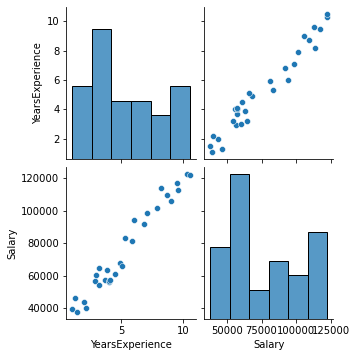

In [6]:
sns.pairplot(data)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

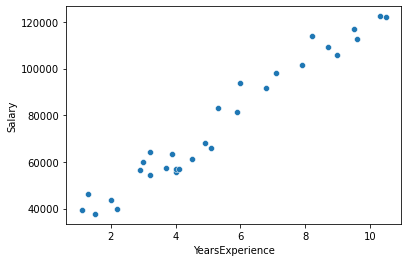

In [8]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])
#From Scatterplot we can conclude that if we increase experience then salary is also increasing

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

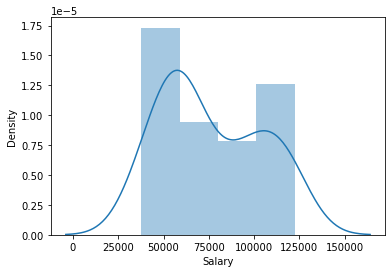

In [35]:
sns.distplot(data['Salary'])
#data is positive skewed

<AxesSubplot:>

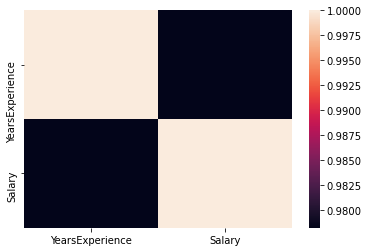

In [10]:
sns.heatmap(data.corr())

In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

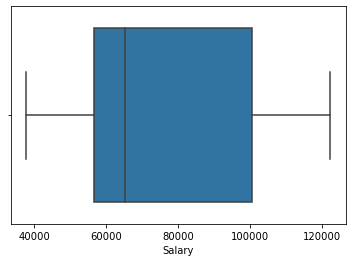

In [13]:
sns.boxplot(data['Salary'],hue=data['YearsExperience'])
# So From boxplot we can find outliers if it exist in data.But for in this case no outliers is present.

# Build the Model

In [15]:
import statsmodels.formula.api as sm

In [19]:
model=sm.ols('Salary~YearsExperience',data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

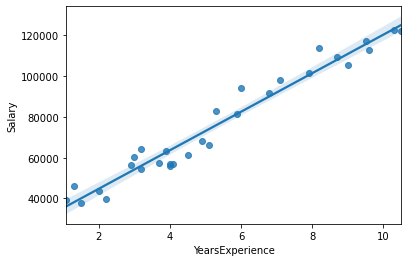

In [23]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [21]:
#coefficient
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
#tvalue and pvalue
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


Here p value of YearsExperience variable is <0.05 so it means that YearsExperience is significant variable.

# Predict the salary for new points

In [30]:
new_data=pd.DataFrame({'YearsExperience':[0.5,1,1.5,10]})

In [31]:
model.predict(new_data)

0     30517.181359
1     35242.162520
2     39967.143681
3    120291.823413
dtype: float64

In [32]:
print(model.rsquared,'\n',model.)
#model is excellent.we can use the predicted values with 95% confidence level

0.9569566641435086
